Loading and pre-processing the dataset:

In [1]:
import pandas as pd

In [3]:
iris=pd.read_csv('iris.data.csv')
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid','species']

In [5]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris.isnull().value_counts()

sepal_len  sepal_wid  petal_len  petal_wid  species
False      False      False      False      False      149
dtype: int64

Performing EDA on the datset:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

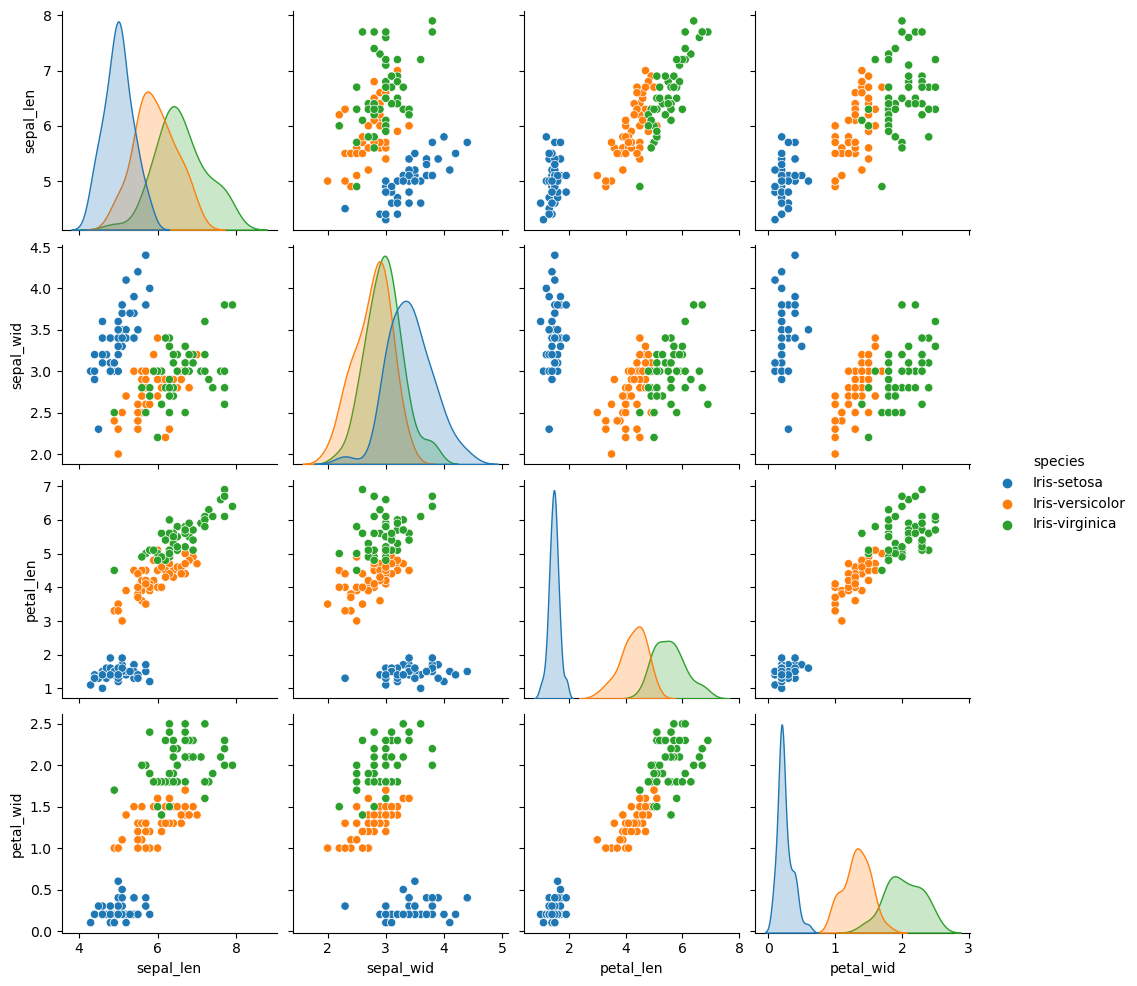

In [8]:
sns.pairplot(iris,hue='species').tight_layout()

C:\Users\ARYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_wid', ylabel='sepal_len'>

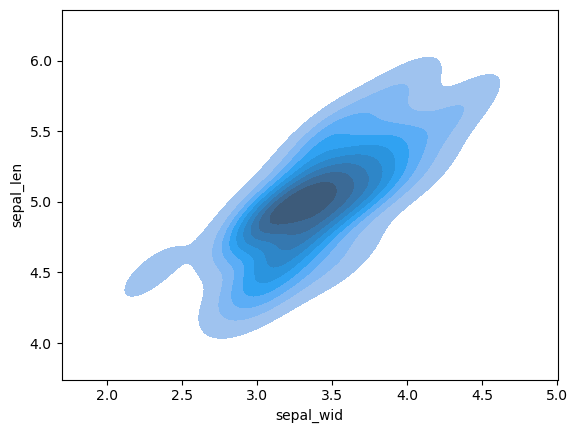

In [25]:
sns.kdeplot(iris[iris['species']=='Iris-setosa']['sepal_wid'],iris[iris['species']=='Iris-setosa']['sepal_len'],shade=True)

Creating a SVC model:

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

In [36]:
target=pd.DataFrame(iris['species'],index=None)
features=iris.drop('species',axis=1,index=None)

In [39]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  149 non-null    float64
 1   sepal_wid  149 non-null    float64
 2   petal_len  149 non-null    float64
 3   petal_wid  149 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [56]:
X_train, X_test, y_train, y_test = train_test_split(features,np.ravel(target),test_size=45)

In [57]:
model = SVC()
model.fit(X_train, y_train)

SVC()

Evaluating the SVC model:

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        20
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.94      0.93      0.93        45



Gridsearch:

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [62]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [63]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01)


Modified evaluation (accounting for hyper-parameters):

In [64]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        20
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.94      0.93      0.93        45

